## Usco Spectral Index

In [1]:
## First get in the imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
#now the data

In [3]:
data = (

[59755.22,	2.6,	0.005,	0.036],
[59755.22,	3.4,	0.0002,	0.022],
[59755.22,	5.1,	0.013,	0.023],
[59755.22,	7.0,	0.061,	0.019],
[59755.22,	13.7,	0.211,	0.027],
[59755.22,	16.5,	0.216,	0.032],
[59755.22,	31.1,	0.424,	0.081],
[59755.22,	34.9,	0.452,	0.099],
[59769.25,	2.6,	0.019,	0.032],
[59769.25,	3.4,	0.013,	0.028],
[59769.25,	5.1,	0.065,	0.031],
[59769.25,	7.0,	0.115,	0.029],
[59769.25,	13.7,	0.125,	0.031],
[59769.25,	16.5,	0.169,	0.029],
[59769.25,	31.1,	0.010,	0.099],
[59769.25,	34.9,	0.193,	0.126],
[59776.14,	2.6,	0.002,	0.009],
[59776.14,	3.4,	0.010,	0.015],
[59776.14,	5.1,	0.017,	0.010],
[59776.14,	7.0,	0.057,	0.026],
[59776.14,	13.7,	0.105,	0.012],
[59776.14,	16.5,	0.108,	0.013],
[59776.14,	31.1,	0.185,	0.044],
[59776.14,	34.9,	0.152,	0.052],
[59796.03,	2.6,	-0.008,	0.038],
[59796.03,	3.4,	0.026,	0.025],
[59796.03,	5.1,	0.024,	0.022],
[59796.03,	7.0,	0.030,	0.020],
[59796.03,	13.7,	0.048,	0.025],
[59796.03,	16.5,	0.042,	0.029],
[59796.03,	31.1,	0.103,	0.072],
[59796.03,	34.9,	0.009,	0.083],
[59815.03,	2.6,	0.020,	0.057],
[59815.03,	3.4,	0.018,	0.027],
[59815.03,	5.1,	0.025,	0.024],
[59815.03,	7.0,	0.020,	0.023],
[59815.03,	13.7,	0.014,	0.022],
[59815.03,	16.5,	0.023,	0.027],
[59815.03,	31.1,	0.035,	0.065],
[59815.03,	34.9,	0.026,	0.070]

)

df =  pd.DataFrame(data, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

In [4]:
E1 = (

[59755.22,	2.6,	0.005,	0.036],
[59755.22,	3.4,	0.0002,	0.022],
[59755.22,	5.1,	0.013,	0.023],
[59755.22,	7.0,	0.061,	0.019],
[59755.22,	13.7,	0.211,	0.027],
[59755.22,	16.5,	0.216,	0.032],
[59755.22,	31.1,	0.424,	0.081],
[59755.22,	34.9,	0.452,	0.099],
)

E2 = (
[59769.25,	2.6,	0.019,	0.032],
[59769.25,	3.4,	0.013,	0.028],
[59769.25,	5.1,	0.065,	0.031],
[59769.25,	7.0,	0.115,	0.029],
[59769.25,	13.7,	0.125,	0.031],
[59769.25,	16.5,	0.169,	0.029],
[59769.25,	31.1,	0.010,	0.099],
[59769.25,	34.9,	0.193,	0.126],
)

E3 = (
[59776.14,	2.6,	0.002,	0.009],
[59776.14,	3.4,	0.010,	0.015],
[59776.14,	5.1,	0.017,	0.010],
[59776.14,	7.0,	0.057,	0.026],
[59776.14,	13.7,	0.105,	0.012],
[59776.14,	16.5,	0.108,	0.013],
[59776.14,	31.1,	0.185,	0.044],
[59776.14,	34.9,	0.152,	0.052],
)

E4 = (
[59796.03,	2.6,	-0.008,	0.038],
[59796.03,	3.4,	0.026,	0.025],
[59796.03,	5.1,	0.024,	0.022],
[59796.03,	7.0,	0.030,	0.020],
[59796.03,	13.7,	0.048,	0.025],
[59796.03,	16.5,	0.042,	0.029],
[59796.03,	31.1,	0.103,	0.072],
[59796.03,	34.9,	0.009,	0.083],
)

E5 = (
[59815.03,	2.6,	0.020,	0.057],
[59815.03,	3.4,	0.018,	0.027],
[59815.03,	5.1,	0.025,	0.024],
[59815.03,	7.0,	0.020,	0.023],
[59815.03,	13.7,	0.014,	0.022],
[59815.03,	16.5,	0.023,	0.027],
[59815.03,	31.1,	0.035,	0.065],
[59815.03,	34.9,	0.026,	0.070]
)

In [5]:
df1 =  pd.DataFrame(E1, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df2 =  pd.DataFrame(E2, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df3 =  pd.DataFrame(E3, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df4 =  pd.DataFrame(E4, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

df5 =  pd.DataFrame(E5, columns = ["MJD",	"Frequency(GHz)",	"Fluxdensity(mJy)",	"error(mJy)"])

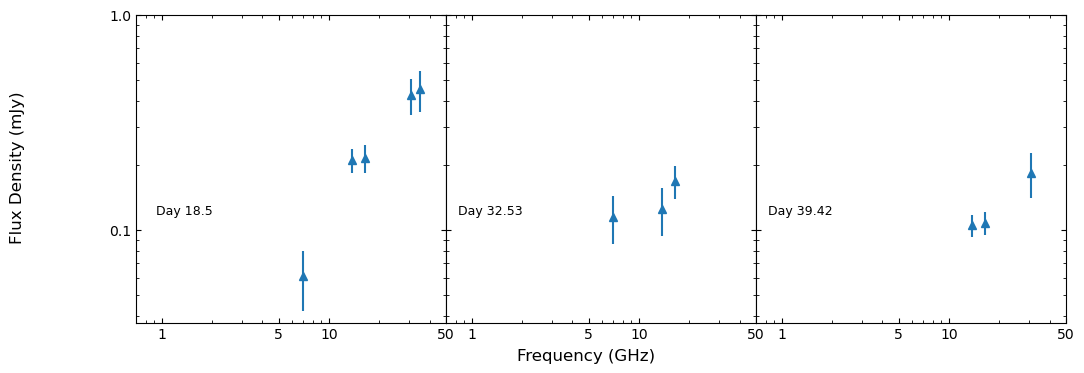

In [6]:
dfs = [df1, df2, df3]

annotations = ['Day 18.5', 'Day 32.53', 'Day 39.42']


fig, ax = plt.subplots(1, 3, sharex='all', sharey='all')
fig.set_size_inches(12, 4)
fig.subplots_adjust(hspace=0, wspace=0)


for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df["Fluxdensity(mJy)"] > 3 * df["error(mJy)"] #don't show the non-detections
    if mask.any():
        ax[col].errorbar(df["Frequency(GHz)"][mask], df["Fluxdensity(mJy)"][mask], yerr=df["error(mJy)"][mask], fmt='^')
        ax[col].set_xscale('log')
        ax[col].set_yscale('log')
        ax[col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[col].set_yticks([.1, 1], labels=['0.1','1.0'])
        ax[col].annotate(label, xy=(55, 85), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

## Day 18.50

In [7]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)


In [33]:
#(work for anything with 3+ points)
mask = df1['Fluxdensity(mJy)'] > 3 * df1['error(mJy)']  # apply detection threshold

x1 = df1['Frequency(GHz)'][mask].values.tolist()
y1 = df1['Fluxdensity(mJy)'][mask].values.tolist()
yerr = df1['error(mJy)'][mask].values.tolist()

In [34]:
yerr1 = error(yerr, x1, y1)

In [36]:
PL1 =  PowerLaw1D(amplitude = y1[0], x_0= x1[0], alpha= 5.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit1 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model1 = fit1(PL1, x1, y1)


#weight is 1/error^2
y_weight1 = 1/ (np.power(yerr1, 2))  

# fit the data using the uncertainties as weights
fit_model_weights1 = fit1(PL1, x1, y1, weights=y_weight1)

fit_model_weights1


<PowerLaw1D(amplitude=0.07871802, x_0=7.91100838, alpha=-1.41268877)>

In [14]:
fit1.fit_info

{'nfev': 21,
 'fvec': array([ 14.1062432 , -34.06934796,   4.27418888,  14.41002658,
         15.93574556]),
 'fjac': array([[-3.65136828e+03,  1.19143660e+02,  5.13268312e+01,
          2.26613775e-01,  1.88215165e-01],
        [ 1.19143660e+02,  1.38215474e+02,  2.55337546e-14,
          5.46825269e-01,  4.99289292e-01],
        [ 5.13268312e+01,  4.56838583e-15, -6.49913251e-15,
          7.22855567e-01,  6.60017129e-01]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([ 1.11888847e-03, -1.37269689e-03, -4.21955273e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.67807139e+24,  3.32795949e+26, -1.09997835e+10],
        [ 3.32795949e+26,  2.36749580e+28, -7.82519780e+11],
        [-1.09997835e+10, -7.82519780e+11,  7.82107231e-05]]),
 'njev': 12,
 'cov_x': array([[ 4.67807139e+24,  3.32795949e+26, -1.09997835e+10],
        [ 3.32795949e+26,  2.36749580e+28

In [15]:
#taking fvec
fvec1 = np.array([ 14.1062432 , -34.06934796,   4.27418888,  14.41002658,
         15.93574556])
var1 = np.var(fvec1)

#taking cov_x
cov_x1 = np.array([[ 4.67807139e+24,  3.32795949e+26, -1.09997835e+10],
        [ 3.32795949e+26,  2.36749580e+28, -7.82519780e+11],
        [-1.09997835e+10, -7.82519780e+11,  7.82107231e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag1 = stand(cov_x1*var1) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag1[2]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.16763887719512657


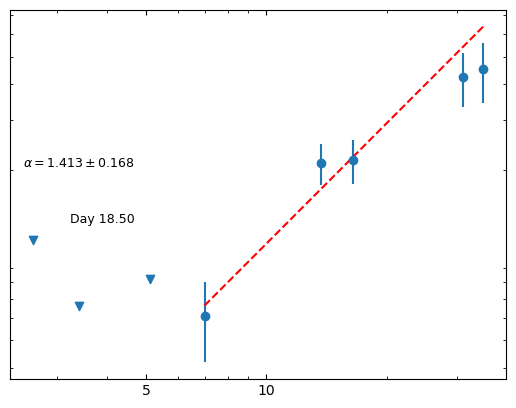

In [53]:
#plotting to check
fig,ax = plt.subplots()
mask = df1['Fluxdensity(mJy)'] > 3 * df1['error(mJy)']  # apply detection threshold
mask2 = df1['Fluxdensity(mJy)'] < 3 * df1['error(mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df1['Frequency(GHz)'][mask], df1['Fluxdensity(mJy)'][mask], yerr=yerr1, fmt='o')
    ax.scatter(df1['Frequency(GHz)'][mask2], (df1['Fluxdensity(mJy)'][mask2] + 3*df1['error(mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 18.50', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df1['Frequency(GHz)'][mask], fit_model_weights1(df1['Frequency(GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 1.413 \\pm 0.168}$', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 32.53

In [37]:
#(work for anything with 3+ points)
mask = df2['Fluxdensity(mJy)'] > 3 * df2['error(mJy)']  # apply detection threshold

x2 = df2['Frequency(GHz)'][mask].values.tolist()
y2 = df2['Fluxdensity(mJy)'][mask].values.tolist()
yerr2 = df2['error(mJy)'][mask].values.tolist()


In [38]:
yerr2 = error(yerr2, x2, y2)

In [39]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)


#weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2, 2))  

# fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2


<PowerLaw1D(amplitude=0.7616623, x_0=1091.88920518, alpha=-0.38013484)>

In [40]:
fit2.fit_info

{'nfev': 31,
 'fvec': array([ -3.76283044,  17.18111812, -12.64150018]),
 'fjac': array([[-1.03359448e+03, -2.97817576e+02,  7.88870568e-02],
        [-2.97817576e+02, -2.40906863e+01,  6.38123298e-03],
        [ 7.88870568e-02,  6.38123298e-03,  1.73472348e-18]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-1.85935683e-03, -2.46597483e-04,  2.16600379e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 20,
 'cov_x': array([[2.33158013e+28, 8.80227468e+31, 9.01459050e+12],
        [8.80227468e+31, 3.32306999e+35, 3.40322431e+16],
        [9.01459050e+12, 3.40322431e+16, 3.62930268e-03]])}

In [41]:
#taking fvec
fvec2 = np.array([ -3.76283044,  17.18111812, -12.64150018])
var2 = np.var(fvec2)

#taking cov_x
cov_x2 = np.array([[2.33158013e+28, 8.80227468e+31, 9.01459050e+12],
        [8.80227468e+31, 3.32306999e+35, 3.40322431e+16],
        [9.01459050e+12, 3.40322431e+16, 3.62930268e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(cov_x2*var2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag2[2]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.7532117131791589


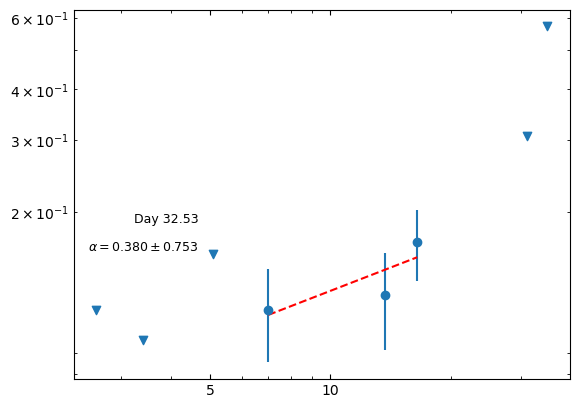

In [43]:
#plotting to check
fig,ax = plt.subplots()
mask = df2['Fluxdensity(mJy)'] > 3 * df2['error(mJy)']  # apply detection threshold
mask2 = df2['Fluxdensity(mJy)'] < 3 * df2['error(mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Frequency(GHz)'][mask], df2['Fluxdensity(mJy)'][mask], yerr=yerr2, fmt='o')
    ax.scatter(df2['Frequency(GHz)'][mask2], (df2['Fluxdensity(mJy)'][mask2] + 3*df2['error(mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 32.53', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Frequency(GHz)'][mask], fit_model_weights2(df2['Frequency(GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.380 \\pm 0.753}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 39.42

In [44]:
#(work for anything with 3+ points)
mask = df3['Fluxdensity(mJy)'] > 3 * df3['error(mJy)']  # apply detection threshold

x3 = df3['Frequency(GHz)'][mask].values.tolist()
y3 = df3['Fluxdensity(mJy)'][mask].values.tolist()
yerr3 = df3['error(mJy)'][mask].values.tolist()


In [45]:
yerr3 = error(yerr3, x3, y3)

In [46]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= .4) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit3 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)


#weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3, 2))  

# fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=0.09906752, x_0=12.62166634, alpha=-0.43969211)>

In [47]:
fit3.fit_info

{'nfev': 13,
 'fvec': array([ -9.03173287,  12.09337772, -16.55803557]),
 'fjac': array([[-5.70638960e+03,  1.02452443e+02,  1.96928996e+01],
        [ 1.02452443e+02,  7.01564027e+01,  3.34919373e-12],
        [ 1.96928996e+01, -4.10682865e-15,  3.42493303e-15]]),
 'ipvt': array([0, 2, 1], dtype=int32),
 'qtf': array([-1.16605481e-08, -4.29741157e-05,  2.24051451e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': None,
 'njev': 6,
 'cov_x': array([[1.01529518e+24, 2.94200956e+26, 1.72219907e+10],
        [2.94200956e+26, 8.52502836e+28, 4.99039708e+12],
        [1.72219907e+10, 4.99039708e+12, 4.95301510e-04]])}

In [48]:
#taking fvec
fvec3 = np.array([ -9.03173287,  12.09337772, -16.55803557])
var3 = np.var(fvec3)

#taking cov_x
cov_x3 = np.array([[1.01529518e+24, 2.94200956e+26, 1.72219907e+10],
        [2.94200956e+26, 8.52502836e+28, 4.99039708e+12],
        [1.72219907e+10, 4.99039708e+12, 4.95301510e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(cov_x3*var3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag3[2]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.26991553334069746


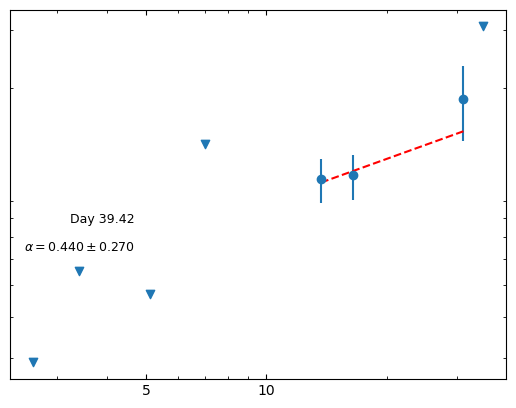

In [50]:
#plotting to check
fig,ax = plt.subplots()
mask = df3['Fluxdensity(mJy)'] > 3 * df3['error(mJy)']  # apply detection threshold
mask2 = df3['Fluxdensity(mJy)'] < 3 * df3['error(mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Frequency(GHz)'][mask], df3['Fluxdensity(mJy)'][mask], yerr=yerr3, fmt='o')
    ax.scatter(df3['Frequency(GHz)'][mask2], (df3['Fluxdensity(mJy)'][mask2] + 3*df3['error(mJy)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 39.42', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Frequency(GHz)'][mask], fit_model_weights3(df3['Frequency(GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.440 \\pm 0.270}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## All together now with the alpha

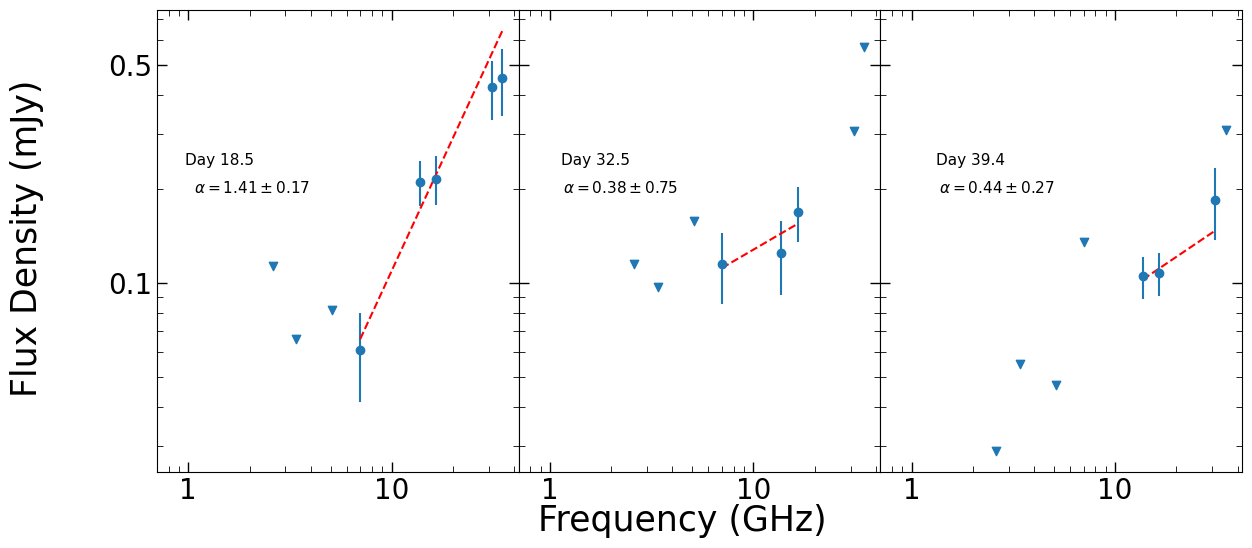

In [59]:
fig, ax = plt.subplots(1, 3, sharex='all', sharey='all')
fig.set_size_inches(14, 6)
fig.subplots_adjust(hspace=0, wspace=0)

mask = df1['Fluxdensity(mJy)'] > 3 * df1['error(mJy)']  # apply detection threshold
mask2 = df1['Fluxdensity(mJy)'] < 3 * df1['error(mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0].errorbar(df1['Frequency(GHz)'][mask], df1['Fluxdensity(mJy)'][mask], yerr=yerr1, fmt='o')
    ax[0].scatter(df1['Frequency(GHz)'][mask2], (df1['Fluxdensity(mJy)'][mask2] + 3*df1['error(mJy)'][mask2]), marker='v')
    ax[0].set_xscale('log')
    ax[0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[0].set_yscale('log')
    ax[0].set_yticks([0.01,0.1,1, 5, 10, 20, 50], labels=['0.01','0.1','1', '5', '10', '20', '50'], fontsize = 20)
    ax[0].annotate('Day 18.5', xy=(70, 230), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[0].plot(df1['Frequency(GHz)'][mask], fit_model_weights1(df1['Frequency(GHz)'][mask]), 'r--')
    ax[0].annotate('${\u03B1 = 1.41 \\pm 0.17}$', xy=(110, 210), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df2['Fluxdensity(mJy)'] > 3 * df2['error(mJy)']  # apply detection threshold
mask2 = df2['Fluxdensity(mJy)'] < 3 * df2['error(mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1].errorbar(df2['Frequency(GHz)'][mask], df2['Fluxdensity(mJy)'][mask], yerr=yerr2, fmt='o')
    ax[1].scatter(df2['Frequency(GHz)'][mask2], (df2['Fluxdensity(mJy)'][mask2] + 3*df2['error(mJy)'][mask2]), marker='v')
    ax[1].set_xscale('log')
    ax[1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], fontsize = 20)
    ax[1].set_yscale('log')
    ax[1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], fontsize = 20)
    ax[1].annotate('Day 32.5', xy=(80, 230), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[1].plot(df2['Frequency(GHz)'][mask], fit_model_weights2(df2['Frequency(GHz)'][mask]), 'r--')
    ax[1].annotate('${\u03B1 = 0.38 \\pm 0.75}$', xy=(115, 210), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

#plotting to check
mask = df3['Fluxdensity(mJy)'] > 3 * df3['error(mJy)']  # apply detection threshold
mask2 = df3['Fluxdensity(mJy)'] < 3 * df3['error(mJy)']  # apply non-detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2].errorbar(df3['Frequency(GHz)'][mask], df3['Fluxdensity(mJy)'][mask], yerr=yerr3, fmt='o')
    ax[2].scatter(df3['Frequency(GHz)'][mask2], (df3['Fluxdensity(mJy)'][mask2] + 3*df3['error(mJy)'][mask2]), marker='v')
    ax[2].set_xscale('log')
    ax[2].set_xticks([1, 10, 50], labels=['1', '10', '50'], fontsize = 20)
    ax[2].set_yscale('log')
    ax[2].set_yticks([0.1, 0.5,1, 5, 10, 20, 50], labels=['0.1','0.5','1', '5', '10', '20', '50'], fontsize = 20)
    ax[2].annotate('Day 39.4', xy=(90, 230), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
    ax[2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)

    ax[2].plot(df3['Frequency(GHz)'][mask], fit_model_weights3(df3['Frequency(GHz)'][mask]), 'r--')
    ax[2].annotate('${\u03B1 = 0.44 \\pm 0.27}$', xy=(125, 210), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))




fig.supxlabel("Frequency (GHz)", y=0.00,fontsize = 25)
fig.supylabel("Flux Density (mJy)", fontsize = 25)
plt.savefig("USco_SI.png")
plt.show();